# Setup

In [1]:
%reset -f

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import importlib, os, ipywidgets

from lib import path_tools as pt
from lib import import_data
from lib import analysis

# XRD

In [4]:
pt.wipe_scrap()

# Set the technique we're working with today
# Valid values: 'xrd', 'pl', 'uvvis'
flag = "xrd"

In [5]:
importlib.reload(import_data)

<module 'lib.import_data' from '/home/tomas/Documents/sciencetools_py/lib/import_data.py'>

In [5]:
# Identify the folder(s) where the raw, original data is
# Use a dict to store multiple directories that you want ready to plot
XRD_data = {}

samples_dir = {
    "etb062": "191206 ETB-062 MAPbCl on quartz FF/",
    "etb063": "191207 ETB-063 MAPbCl on quartz FF/",
    "etb064": "191208 ETB-064 MAPbCl on quartz FF/",
}

for run_ID in samples_dir.keys():
    XRD_data[run_ID] = import_data.init(flag, samples_dir[run_ID])

Creating new local data folder.
Creating new local data folder.
Creating new local data folder.


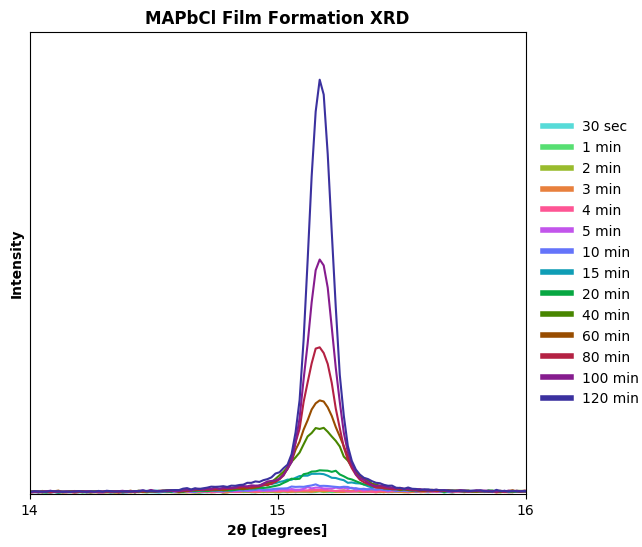

In [27]:
fig2 = plt.figure(1, figsize=[6.4, 6])
fig_ax = plt.gca()

offset = 0
lbl = None

master_cypher = (
    "30sec",
    "1min",
    "2min",
    "3min",
    "4min",
    "5min",
    "10min",
    "15min",
    "20min",
    "40min",
    "60min",
    "80min",
    "100min",
    "120min",
)

for sample_ID in master_cypher:
    for run_ID in samples_dir.keys():
        if sample_ID in XRD_data[run_ID].keys():
            samplemax = max(np.log10(XRD_data[run_ID][sample_ID]["counts"]))
            
            if "min" in sample_ID:
                lbl = sample_ID.replace("min", " min")
            elif "sec" in sample_ID:
                lbl = sample_ID.replace("sec", " sec")
            
            plt.figure(1)
            plt.plot(XRD_data[run_ID][sample_ID]["2theta"], XRD_data[run_ID][sample_ID]["counts"],
                     label=lbl)
            
#             offset += samplemax
            
plt.style.use('default')
sns.set_palette(sns.cubehelix_palette(14, rot=4, hue=2, light=0.7, dark=0.25))
    

plt.xlabel("2θ [degrees]", weight="semibold")
plt.ylabel("Intensity", weight="semibold")

plt.xlim(14, 16)
plt.ylim(2, 500)

# fig_ax.set_yticklabels([])
plt.yticks([])
plt.xticks(range(14, 17, 1))
# fig_ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

plt.title("MAPbCl Film Formation XRD",weight="semibold")

leg = plt.legend(loc='center left', bbox_to_anchor=(1.01, 0,.22,1),mode='expand', frameon=False)
for i in leg.legendHandles:
    i.set_linewidth(4)   

In [28]:
fig2.savefig("plots/final/XRD/MAPbCl_all_overlay.png", dpi=200, format='png', bbox_inches='tight')

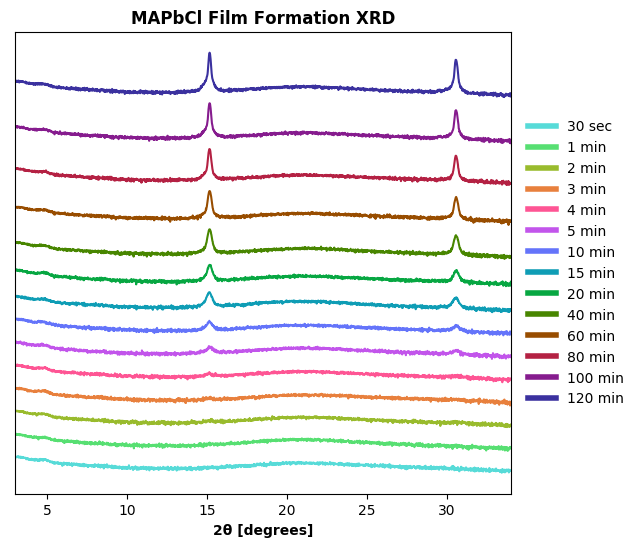

In [31]:
fig = plt.figure(1, figsize=[6.4, 6])
fig_ax = plt.gca()

offset = 0
lbl = None

master_cypher = (
    "30sec",
    "1min",
    "2min",
    "3min",
    "4min",
    "5min",
    "10min",
    "15min",
    "20min",
    "40min",
    "60min",
    "80min",
    "100min",
    "120min",
)

for sample_ID in master_cypher:
    for run_ID in samples_dir.keys():
        if sample_ID in XRD_data[run_ID].keys():
            samplemax = max(np.log10(XRD_data[run_ID][sample_ID]["counts"]))
            
            if "min" in sample_ID:
                lbl = sample_ID.replace("min", " min")
            elif "sec" in sample_ID:
                lbl = sample_ID.replace("sec", " sec")
            
            plt.figure(1)
            plt.plot(XRD_data[run_ID][sample_ID]["2theta"], np.log10(XRD_data[run_ID][sample_ID]["counts"]) + offset,
                     label=lbl)
            
            offset += samplemax
            
plt.style.use('default')
sns.set_palette(sns.cubehelix_palette(14, rot=4, hue=2, light=0.7, dark=0.25))

plt.xlabel("2θ [degrees]", weight="semibold")

plt.yticks([])

plt.xlim(3, 34)

plt.title("MAPbCl Film Formation XRD",weight="semibold")

leg = plt.legend(loc='center left', bbox_to_anchor=(1.01, 0,.22,1), mode='expand', frameon=False)
for i in leg.legendHandles:
    i.set_linewidth(4)    

In [32]:
fig.savefig("plots/final/XRD/MAPbCl_all_stacked.png", dpi=200, format='png', bbox_inches='tight')

# PL

In [10]:
pt.wipe_scrap()

# Set the technique we're working with today
# Valid values: 'xrd', 'pl', 'uvvis'
flag = "pl"

In [11]:
importlib.reload(import_data)
importlib.reload(analysis)

<module 'lib.analysis' from '/home/tomas/Documents/sciencetools_py/lib/analysis.py'>

In [12]:
# Identify the folder(s) where the raw, original data is
# Use a list to store multiple directories that you want ready to plot
pl_data = {}

samples_dir = {
    "etb062": "191208 ETB-062 MAPbCl on quartz FF/",
    "etb063": "191208 ETB-063 MAPbCl on quartz FF/",
    "etb064": "191208 ETB-064 MAPbCl on quartz FF/",
}

for run_ID in samples_dir:
    pl_data[run_ID] = import_data.init(flag, samples_dir[run_ID])

Creating new local data folder.
Creating new local data folder.
Creating new local data folder.


/home/tomas/Documents/sciencetools_py/lib/analysis.py:14: FutureWarning: `item` has been deprecated and will be removed in a future version
  while (input_df.iloc[current_index]['counts'].item() > (local_max['counts'] / 2)):
/home/tomas/Documents/sciencetools_py/lib/analysis.py:22: FutureWarning: `item` has been deprecated and will be removed in a future version
  while (input_df.iloc[current_index]['counts'].item() > (local_max['counts'] / 2)):
/home/tomas/Documents/sciencetools_py/lib/analysis.py:27: FutureWarning: `item` has been deprecated and will be removed in a future version
  fwhm = right_bound['wavelength'].item() - left_bound['wavelength'].item()
/home/tomas/Documents/sciencetools_py/lib/analysis.py:31: FutureWarning: `item` has been deprecated and will be removed in a future version
  max_location['wavelength'].item(),


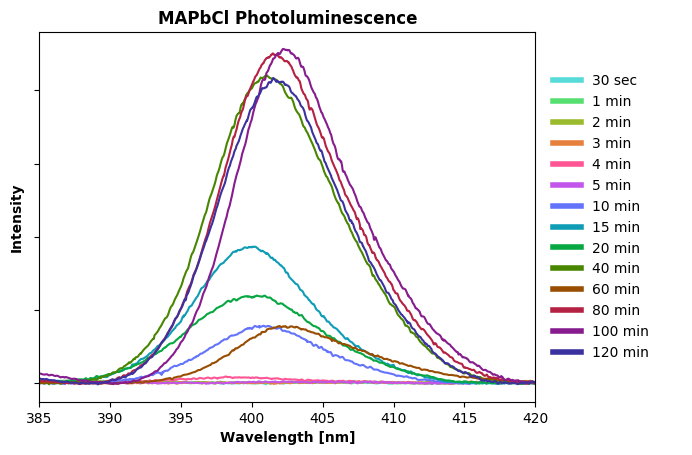

In [13]:
fig3 = plt.figure(1)
fig_ax = plt.gca()

lbl = None

master_cypher = (
    "30sec",
    "1min",
    "2min",
    "3min",
    "4min",
    "5min",
    "10min",
    "15min",
    "20min",
    "40min",
    "60min",
    "80min",
    "100min",
    "120min",
)

raw_analysis = []

for sample_ID in master_cypher:
    for run_ID in samples_dir.keys():
        if sample_ID in pl_data[run_ID].keys():
            raw_analysis.append(analysis.FWHM(flag, sample_ID, pl_data[run_ID][sample_ID]))
            
            if "min" in sample_ID:
                lbl = sample_ID.replace("min", " min")
            elif "sec" in sample_ID:
                lbl = sample_ID.replace("sec", " sec")
                
            if "C" in lbl:
                lbl = lbl.replace("C", "°C")
            
            plt.figure(1)
            plt.plot(pl_data[run_ID][sample_ID]["wavelength"], pl_data[run_ID][sample_ID]["counts"],
#                      abs(max(pl_data[run_ID][sample_ID]["counts"])),
                     label=lbl)
        else:
            pass

max_values = pd.DataFrame(data=raw_analysis,columns=['Sample', 'Max_Wavelength', 'Max_Value', 'FWHM'])

plt.style.use('default')
sns.set_palette(sns.cubehelix_palette(14, rot=4, hue=2, light=0.7, dark=0.25))

plt.xlabel("Wavelength [nm]", weight="semibold")
plt.ylabel("Intensity", weight="semibold")

fig_ax.set_yticklabels([])

# plt.xlim(min(pl_data["etb066"]["15min 50C"]["wavelength"]), max(pl_data["etb066"]["15min 50C"]["wavelength"]))
plt.xlim(385,420)

# plt.ylim(-0.01, max(pl_data["etb049"]["5min"]["counts"])+2000)

plt.title("MAPbCl Photoluminescence",weight="semibold")

leg = plt.legend(loc='center left', bbox_to_anchor=(1.01, 0,.3,1),mode='expand', frameon=False)
for i in leg.legendHandles:
    i.set_linewidth(4)   

In [14]:
fig3.savefig("plots/final/PL/MAPbCl_all.png", dpi=200, format='png', bbox_inches='tight')

In [15]:
max_values.to_csv('plots/final/PL/MAPbCl_all.csv')

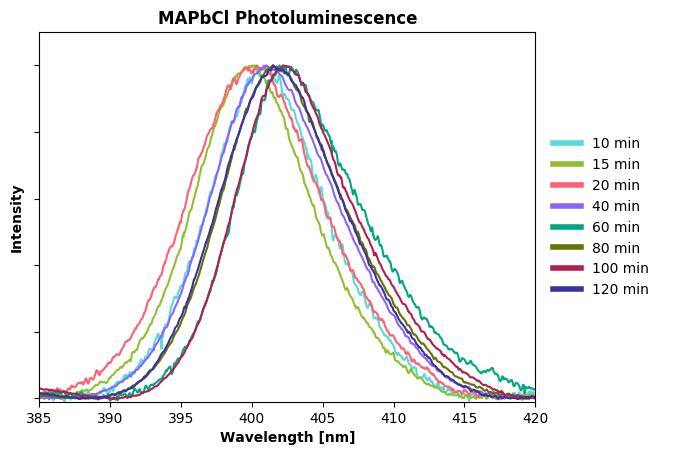

In [17]:
fig6 = plt.figure(1)
fig_ax = plt.gca()

lbl = None

master_cypher = (
#     "30sec",
#     "1min",
#     "2min",
#     "3min",
#     "4min",
#     "5min",
    "10min",
    "15min",
    "20min",
    "40min",
    "60min",
    "80min",
    "100min",
    "120min",
)

raw_analysis = []

for sample_ID in master_cypher:
    for run_ID in samples_dir.keys():
        if sample_ID in pl_data[run_ID].keys():
#             raw_analysis.append(analysis.FWHM(flag, sample_ID, pl_data[run_ID][sample_ID]))
            
            if "min" in sample_ID:
                lbl = sample_ID.replace("min", " min")
            elif "sec" in sample_ID:
                lbl = sample_ID.replace("sec", " sec")
                
            if "C" in lbl:
                lbl = lbl.replace("C", "°C")
            
            plt.figure(1)
            plt.plot(pl_data[run_ID][sample_ID]["wavelength"], pl_data[run_ID][sample_ID]["counts"]/
                     abs(max(pl_data[run_ID][sample_ID]["counts"])),
                     label=lbl)
        else:
            pass

max_values = pd.DataFrame(data=raw_analysis,columns=['Sample', 'Max_Wavelength', 'Max_Value', 'FWHM'])

plt.style.use('default')
sns.set_palette(sns.cubehelix_palette(8, rot=4, hue=2, light=0.7, dark=0.25))

plt.xlabel("Wavelength [nm]", weight="semibold")
plt.ylabel("Intensity", weight="semibold")

fig_ax.set_yticklabels([])

# plt.xlim(min(pl_data["etb066"]["15min 50C"]["wavelength"]), max(pl_data["etb066"]["15min 50C"]["wavelength"]))
plt.xlim(385,420)

plt.ylim(-0.01, 1.1)

plt.title("MAPbCl Photoluminescence",weight="semibold")

leg = plt.legend(loc='center left', bbox_to_anchor=(1.01, 0,.3,1),mode='expand', frameon=False)
for i in leg.legendHandles:
    i.set_linewidth(4)   

In [18]:
fig6.savefig("plots/final/PL/MAPbCl_norm_cleaned.png", dpi=200, format='png', bbox_inches='tight')

# UV-Vis

In [66]:
pt.wipe_scrap()

    # Set the technique we're working with today
# Valid values: 'xrd', 'pl', 'uvvis'
flag = "uvvis"

In [67]:
importlib.reload(import_data);

In [68]:
# Identify the folder(s) where the raw, original data is
# Use a dict to store multiple directories that you want ready to plot
uv_data = {}

samples_dir = {
    "etb062": "191208 ETB-062 MAPbCl on quartz FF/",
    "etb063": "191208 ETB-063 MAPbCl on quartz FF/",
    "etb064": "191208 ETB-064 MAPbCl on quartz FF/",
}

for run_ID in samples_dir.keys():
    uv_data[run_ID] = import_data.init(flag, samples_dir[run_ID])

Creating new local data folder.
Creating new local data folder.
Creating new local data folder.


In [14]:
# Expression to find where index = X nm for normalizing later
uv_data["etb044"]['1min'].index[uv_data["etb044"]['1min']['wavelength'] == 550]

Int64Index([250], dtype='int64')

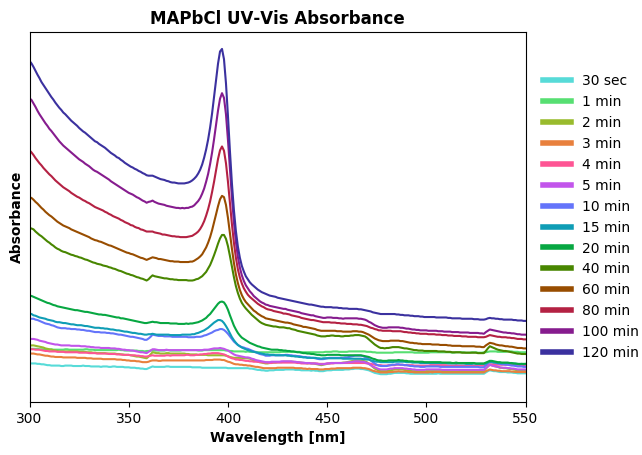

In [71]:
fig4 = plt.figure(1)
fig_ax = plt.gca()

plotted = None
localmax = 0
lbl = []

master_cypher = (
    "30sec",
    "1min",
    "2min",
    "3min",
    "4min",
    "5min",
    "10min",
    "15min",
    "20min",
    "40min",
    "60min",
    "80min",
    "100min",
    "120min",
)

for sample_ID in master_cypher:
    
    for run_ID in samples_dir.keys():
        if sample_ID in uv_data[run_ID].keys() and plotted != True:
            
#             localmax = uv_data[run_ID][sample_ID]["abs"].loc[50:120].max()
            
            if "min" in sample_ID:
                lbl = sample_ID.replace("min", " min")
            elif "sec" in sample_ID:
                lbl = sample_ID.replace("sec", " sec")
                
            if "C" in lbl:
                lbl = lbl.replace("C", "°C")
    
            plt.figure(1)
            plt.plot(uv_data[run_ID][sample_ID]["wavelength"], uv_data[run_ID][sample_ID]["abs"],
#                      abs(uv_data[run_ID][sample_ID]["abs"].min()),
#                      localmax,
                     label=lbl)
            
            plotted = True
            localmax = 0
        else:
            pass
    
    plotted = False

plt.style.use('default')
sns.set_palette(sns.cubehelix_palette(14, rot=4, hue=2, light=0.7, dark=0.25))

plt.xlabel("Wavelength [nm]", weight="semibold")
plt.ylabel("Absorbance", weight="semibold")

plt.yticks([])

plt.xlim(300, 550)

plt.title("MAPbCl UV-Vis Absorbance",weight="semibold")

leg = plt.legend(loc='center left', bbox_to_anchor=(1.01, 0,.22,1), mode='expand', frameon=False)
for i in leg.legendHandles:
    i.set_linewidth(4)   

In [87]:
uv_data["etb070"]["120min"]["abs"].loc[50:120].max()

1.1840000000000002

In [72]:
fig4.savefig("plots/final/UVVIS/MAPbCl_all.png", dpi=200, format='png', bbox_inches='tight')

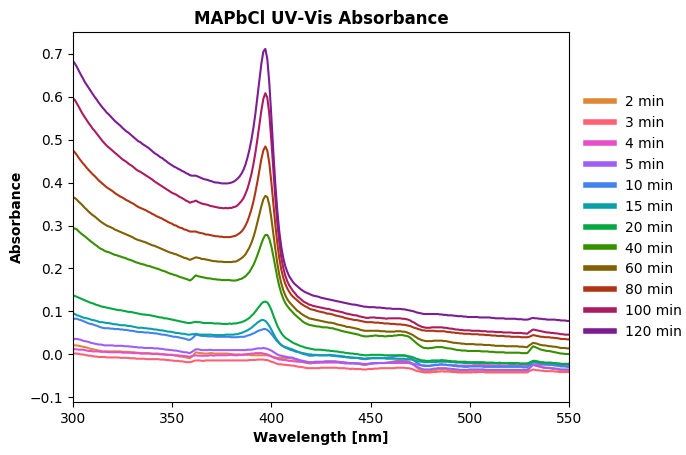

In [78]:
fig5 = plt.figure(1)
fig_ax = plt.gca()

plotted = None
localmax = 0
lbl = []

master_cypher = (
#     "30sec",
#     "1min",
    "2min",
    "3min",
    "4min",
    "5min",
    "10min",
    "15min",
    "20min",
    "40min",
    "60min",
    "80min",
    "100min",
    "120min",
)

for sample_ID in master_cypher:
    
    for run_ID in samples_dir.keys():
        if sample_ID in uv_data[run_ID].keys() and plotted != True:
            
#             localmax = uv_data[run_ID][sample_ID]["abs"].loc[50:120].max()
            
            if "min" in sample_ID:
                lbl = sample_ID.replace("min", " min")
            elif "sec" in sample_ID:
                lbl = sample_ID.replace("sec", " sec")
                
            if "C" in lbl:
                lbl = lbl.replace("C", "°C")
    
            plt.figure(1)
            plt.plot(uv_data[run_ID][sample_ID]["wavelength"], uv_data[run_ID][sample_ID]["abs"],
#                      abs(uv_data[run_ID][sample_ID]["abs"].min()),
#                      localmax,
                     label=lbl)
            
            plotted = True
            localmax = 0
        else:
            pass
    
    plotted = False

plt.style.use('default')
sns.set_palette(sns.cubehelix_palette(13, rot=4, hue=2, light=0.6, dark=0.25))

plt.xlabel("Wavelength [nm]", weight="semibold")
plt.ylabel("Absorbance", weight="semibold")

# plt.yticks([])

plt.xlim(300, 550)
# plt.ylim(0,3)

plt.title("MAPbCl UV-Vis Absorbance",weight="semibold")

leg = plt.legend(loc='center left', bbox_to_anchor=(1.01, 0,.22,1), mode='expand', frameon=False)
for i in leg.legendHandles:
    i.set_linewidth(4)  

In [28]:
uv_data["etb045"]["4min"]["abs"].loc[50:120].max()

0.11800000000000001

In [79]:
fig5.savefig("plots/final/UVVIS/MAPbCl_cleaned.png", dpi=200, format='png', bbox_inches='tight')